<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Loan-Risk" data-toc-modified-id="Predicting-Loan-Risk-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Loan Risk</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-and-Clean-data" data-toc-modified-id="Load-and-Clean-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and Clean data</a></span></li><li><span><a href="#Drop-Some-Features" data-toc-modified-id="Drop-Some-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drop Some Features</a></span></li><li><span><a href="#Check-for-missing-data" data-toc-modified-id="Check-for-missing-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check for missing data</a></span></li><li><span><a href="#Categorize-Features" data-toc-modified-id="Categorize-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorize Features</a></span></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualize data</a></span></li><li><span><a href="#Building-a-PysPsark-pipeline-for-Model" data-toc-modified-id="Building-a-PysPsark-pipeline-for-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Building a PysPsark pipeline for Model</a></span><ul class="toc-item"><li><span><a href="#Split-the-data-into-training-and-test-sets" data-toc-modified-id="Split-the-data-into-training-and-test-sets-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Split the data into training and test sets</a></span></li><li><span><a href="#Use-StringIndexer-to-encode-a-string-column-of-labels-to-a-column-of-label-indices" data-toc-modified-id="Use-StringIndexer-to-encode-a-string-column-of-labels-to-a-column-of-label-indices-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Use StringIndexer to encode a string column of labels to a column of label indices</a></span></li><li><span><a href="#Create-a-pipeline,-and-fit-a-model-using-RandomForestClassifier" data-toc-modified-id="Create-a-pipeline,-and-fit-a-model-using-RandomForestClassifier-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Create a pipeline, and fit a model using RandomForestClassifier</a></span></li><li><span><a href="#Evaluate-more-metrics-by-exporting-them-into-pandas-and-numpy" data-toc-modified-id="Evaluate-more-metrics-by-exporting-them-into-pandas-and-numpy-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Evaluate more metrics by exporting them into pandas and numpy</a></span><ul class="toc-item"><li><span><a href="#from-sklearn.metrics-import-classification_report" data-toc-modified-id="from-sklearn.metrics-import-classification_report-8.4.1"><span class="toc-item-num">8.4.1&nbsp;&nbsp;</span>from sklearn.metrics import classification_report</a></span></li></ul></li></ul></li><li><span><a href="#ML-model" data-toc-modified-id="ML-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ML model</a></span></li><li><span><a href="#Pickle-file" data-toc-modified-id="Pickle-file-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Pickle file</a></span></li></ul></div>

## Predicting Loan Risk

We'll use this notebook to create a machine learning model to predict customer churn.

## Libraries

In [1]:
import pandas as pd
import numpy as np

## Load and Clean data

In [2]:
df = pd.read_csv("../data/german_credit_data.csv")
df.head()

,CustomerID,CheckingStatus,CreditHistory,ExistingSavings,InstallmentPlans,ExistingCreditsCount,EmploymentDuration,Sex,CurrentResidenceDuration,OwnsProperty,...,StreetAddress,City,State,PostalCode,LoanDuration,LoanPurpose,LoanAmount,InstallmentPercent,OthersOnLoan,Risk
0,088d7aa9-6044-41f8-8a75-b6f24120cb2d,no_checking,prior_payments_delayed,greater_1000,none,2,greater_7,male,3,car_other,...,6299 Hubbard Curve Apt. 342,Leefurt,TN,37639,25,business,6453,4,none,Risk
1,b3db4504-3f1f-4668-bcb6-5155fafb0bbd,no_checking,prior_payments_delayed,100_to_500,stores,2,greater_7,male,3,car_other,...,10803 Richard Road Apt. 678,South Terry,CT,6061,27,furniture,7158,5,none,No Risk
2,2072ffde-8f29-44fe-9f29-b2ba81be0bd4,0_to_200,outstanding_credit,100_to_500,none,2,greater_7,female,4,unknown,...,509 Ochoa Squares,Amyport,MN,55789,31,furniture,5702,3,none,Risk
3,0d6e1a8f-77e2-47d8-9740-b4374d578faf,0_to_200,credits_paid_to_date,100_to_500,stores,1,unemployed,male,1,savings_insurance,...,22444 Angela Garden Apt. 199,Danielsfort,KY,42535,14,car_new,2886,1,none,No Risk
4,1ea451a5-e6f2-4710-9a27-a2f3cec5ec66,less_0,prior_payments_delayed,500_to_1000,stores,2,greater_7,male,1,car_other,...,97301 Jenna Trail Apt. 974,South Jenniferberg,VT,5356,15,furniture,2746,3,none,No Risk


## Drop Some Features
Some columns are data attributes that we will not want to use in the machine learning model. We can drop those columns / features:

- CustomerID feature (column)
- Personal Attributes: first_name,last_name,email,street_address,city,state,postal_code 

In [3]:
df = df.drop(columns=['CustomerID', 'FirstName', 'LastName', 'Email', 'StreetAddress', 'City', 'State', 'PostalCode', '_ID'], axis=1, errors='ignore')
df.head(5)

,CheckingStatus,CreditHistory,ExistingSavings,InstallmentPlans,ExistingCreditsCount,EmploymentDuration,Sex,CurrentResidenceDuration,OwnsProperty,Age,...,Job,Dependents,Telephone,ForeignWorker,LoanDuration,LoanPurpose,LoanAmount,InstallmentPercent,OthersOnLoan,Risk
0,no_checking,prior_payments_delayed,greater_1000,none,2,greater_7,male,3,car_other,48,...,skilled,1,none,yes,25,business,6453,4,none,Risk
1,no_checking,prior_payments_delayed,100_to_500,stores,2,greater_7,male,3,car_other,37,...,unskilled,1,none,yes,27,furniture,7158,5,none,No Risk
2,0_to_200,outstanding_credit,100_to_500,none,2,greater_7,female,4,unknown,47,...,skilled,1,yes,yes,31,furniture,5702,3,none,Risk
3,0_to_200,credits_paid_to_date,100_to_500,stores,1,unemployed,male,1,savings_insurance,29,...,skilled,1,none,yes,14,car_new,2886,1,none,No Risk
4,less_0,prior_payments_delayed,500_to_1000,stores,2,greater_7,male,1,car_other,41,...,skilled,1,none,yes,15,furniture,2746,3,none,No Risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5010 non-null   object
 1   CreditHistory             5010 non-null   object
 2   ExistingSavings           5010 non-null   object
 3   InstallmentPlans          5010 non-null   object
 4   ExistingCreditsCount      5010 non-null   int64 
 5   EmploymentDuration        5010 non-null   object
 6   Sex                       5010 non-null   object
 7   CurrentResidenceDuration  5010 non-null   int64 
 8   OwnsProperty              5010 non-null   object
 9   Age                       5010 non-null   int64 
 10  Housing                   5010 non-null   object
 11  Job                       5010 non-null   object
 12  Dependents                5010 non-null   int64 
 13  Telephone                 5010 non-null   object
 14  ForeignWorker           

In [5]:
df.describe(include = 'all')

,CheckingStatus,CreditHistory,ExistingSavings,InstallmentPlans,ExistingCreditsCount,EmploymentDuration,Sex,CurrentResidenceDuration,OwnsProperty,Age,...,Job,Dependents,Telephone,ForeignWorker,LoanDuration,LoanPurpose,LoanAmount,InstallmentPercent,OthersOnLoan,Risk
count,5010,5010,5010,5010,5010.000000,5010,5010,5010.000000,5010,5010.000000,...,5010,5010.000000,5010,5010,5010.000000,5010,5010.000000,5010.000000,5010,5010
unique,4,5,5,3,NaN,5,2,NaN,4,NaN,...,4,NaN,2,2,NaN,11,NaN,NaN,3,2
top,no_checking,prior_payments_delayed,less_100,none,NaN,1_to_4,male,NaN,savings_insurance,NaN,...,skilled,NaN,none,yes,NaN,car_new,NaN,NaN,none,No Risk
freq,1995,1690,1863,3523,NaN,1473,3111,NaN,1667,NaN,...,3409,NaN,2949,4886,NaN,948,NaN,NaN,4181,3339
mean,NaN,NaN,NaN,NaN,1.465669,NaN,NaN,2.853892,NaN,35.931138,...,NaN,1.164271,NaN,NaN,21.400998,NaN,3478.095808,2.981836,NaN,NaN
std,NaN,NaN,NaN,NaN,0.565282,NaN,NaN,1.114797,NaN,10.645762,...,NaN,0.370559,NaN,NaN,11.157929,NaN,2488.056183,1.126581,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,...,NaN,1.000000,NaN,NaN,4.000000,NaN,250.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,28.000000,...,NaN,1.000000,NaN,NaN,13.000000,NaN,1326.250000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,NaN,36.000000,...,NaN,1.000000,NaN,NaN,21.000000,NaN,3237.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,NaN,44.000000,...,NaN,1.000000,NaN,NaN,29.000000,NaN,5354.750000,4.000000,NaN,NaN


## Check for missing data

We should check if there are missing values in our dataset. There are various ways we can address this issue:

- Drop records with missing values 
- Fill in the missing value with one of the following strategies: Zero, Mean of the values for the column, Random value, etc).

In [6]:
# Check if we have any NaN values and see which features have missing values that should be addressed
print(df.isnull().values.any())
df.isnull().sum()

False


CheckingStatus              0
CreditHistory               0
ExistingSavings             0
InstallmentPlans            0
ExistingCreditsCount        0
EmploymentDuration          0
Sex                         0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
Housing                     0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
LoanDuration                0
LoanPurpose                 0
LoanAmount                  0
InstallmentPercent          0
OthersOnLoan                0
Risk                        0
dtype: int64

## Categorize Features

We will categorize some of the columns / features based on whether they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations.

In [8]:
TARGET_LABEL_COLUMN_NAME = 'Risk'
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != TARGET_LABEL_COLUMN_NAME]
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != TARGET_LABEL_COLUMN_NAME]
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Columns: ', categorical_columns)

All Features:  ['CheckingStatus', 'CreditHistory', 'ExistingSavings', 'InstallmentPlans', 'ExistingCreditsCount', 'EmploymentDuration', 'Sex', 'CurrentResidenceDuration', 'OwnsProperty', 'Age', 'Housing', 'Job', 'Dependents', 'Telephone', 'ForeignWorker', 'LoanDuration', 'LoanPurpose', 'LoanAmount', 'InstallmentPercent', 'OthersOnLoan']

Categorical Features:  ['CheckingStatus', 'CreditHistory', 'ExistingSavings', 'InstallmentPlans', 'EmploymentDuration', 'Sex', 'OwnsProperty', 'Housing', 'Job', 'Telephone', 'ForeignWorker', 'LoanPurpose', 'OthersOnLoan']

Continuous Features:  ['ExistingCreditsCount', 'CurrentResidenceDuration', 'Age', 'Dependents', 'LoanDuration', 'LoanAmount', 'InstallmentPercent']

All Categorical Columns:  ['CheckingStatus', 'CreditHistory', 'ExistingSavings', 'InstallmentPlans', 'EmploymentDuration', 'Sex', 'OwnsProperty', 'Housing', 'Job', 'Telephone', 'ForeignWorker', 'LoanPurpose', 'OthersOnLoan', 'Risk']


## Visualize data

Data visualization can be used to find patterns, detect outliers, understand distribution and more. We can use graphs such as:

- Histograms, boxplots, etc: To find distribution / spread of our continuous variables.
- Bar charts: To show frequency in categorical values.

In [9]:
#Libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

Risk
No Risk    3339
Risk       1671
dtype: int64


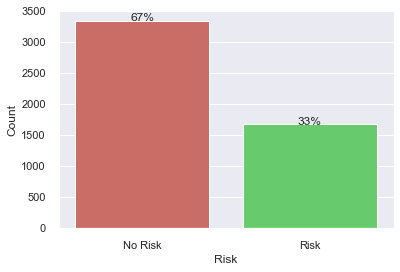

In [10]:
print(df.groupby([TARGET_LABEL_COLUMN_NAME]).size())
risk_plot = sns.countplot(data=df, x=TARGET_LABEL_COLUMN_NAME, order=df[TARGET_LABEL_COLUMN_NAME].value_counts().index)
plt.ylabel('Count')
for p in risk_plot.patches:
    height = p.get_height()
    risk_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

We can get use frequency counts charts to get an understanding of the categorical features relative to Risk

- We can see in the `CheckingStatus` visualization, loan applications with 'no_checking' have a higher occurence of Risk versus loans with other checking status values.
- We can see in the `CreditHistory` visualization, the loans that have no credits (i.e. all credit has been paid back) have no occurences of Risk (at least in this dataset). There is a small count of Risk for those applicants that have paid back all credit to date. And there is a higher frequency or ratio of Risk for applicants that have existing credit (i.e outstanding credit).

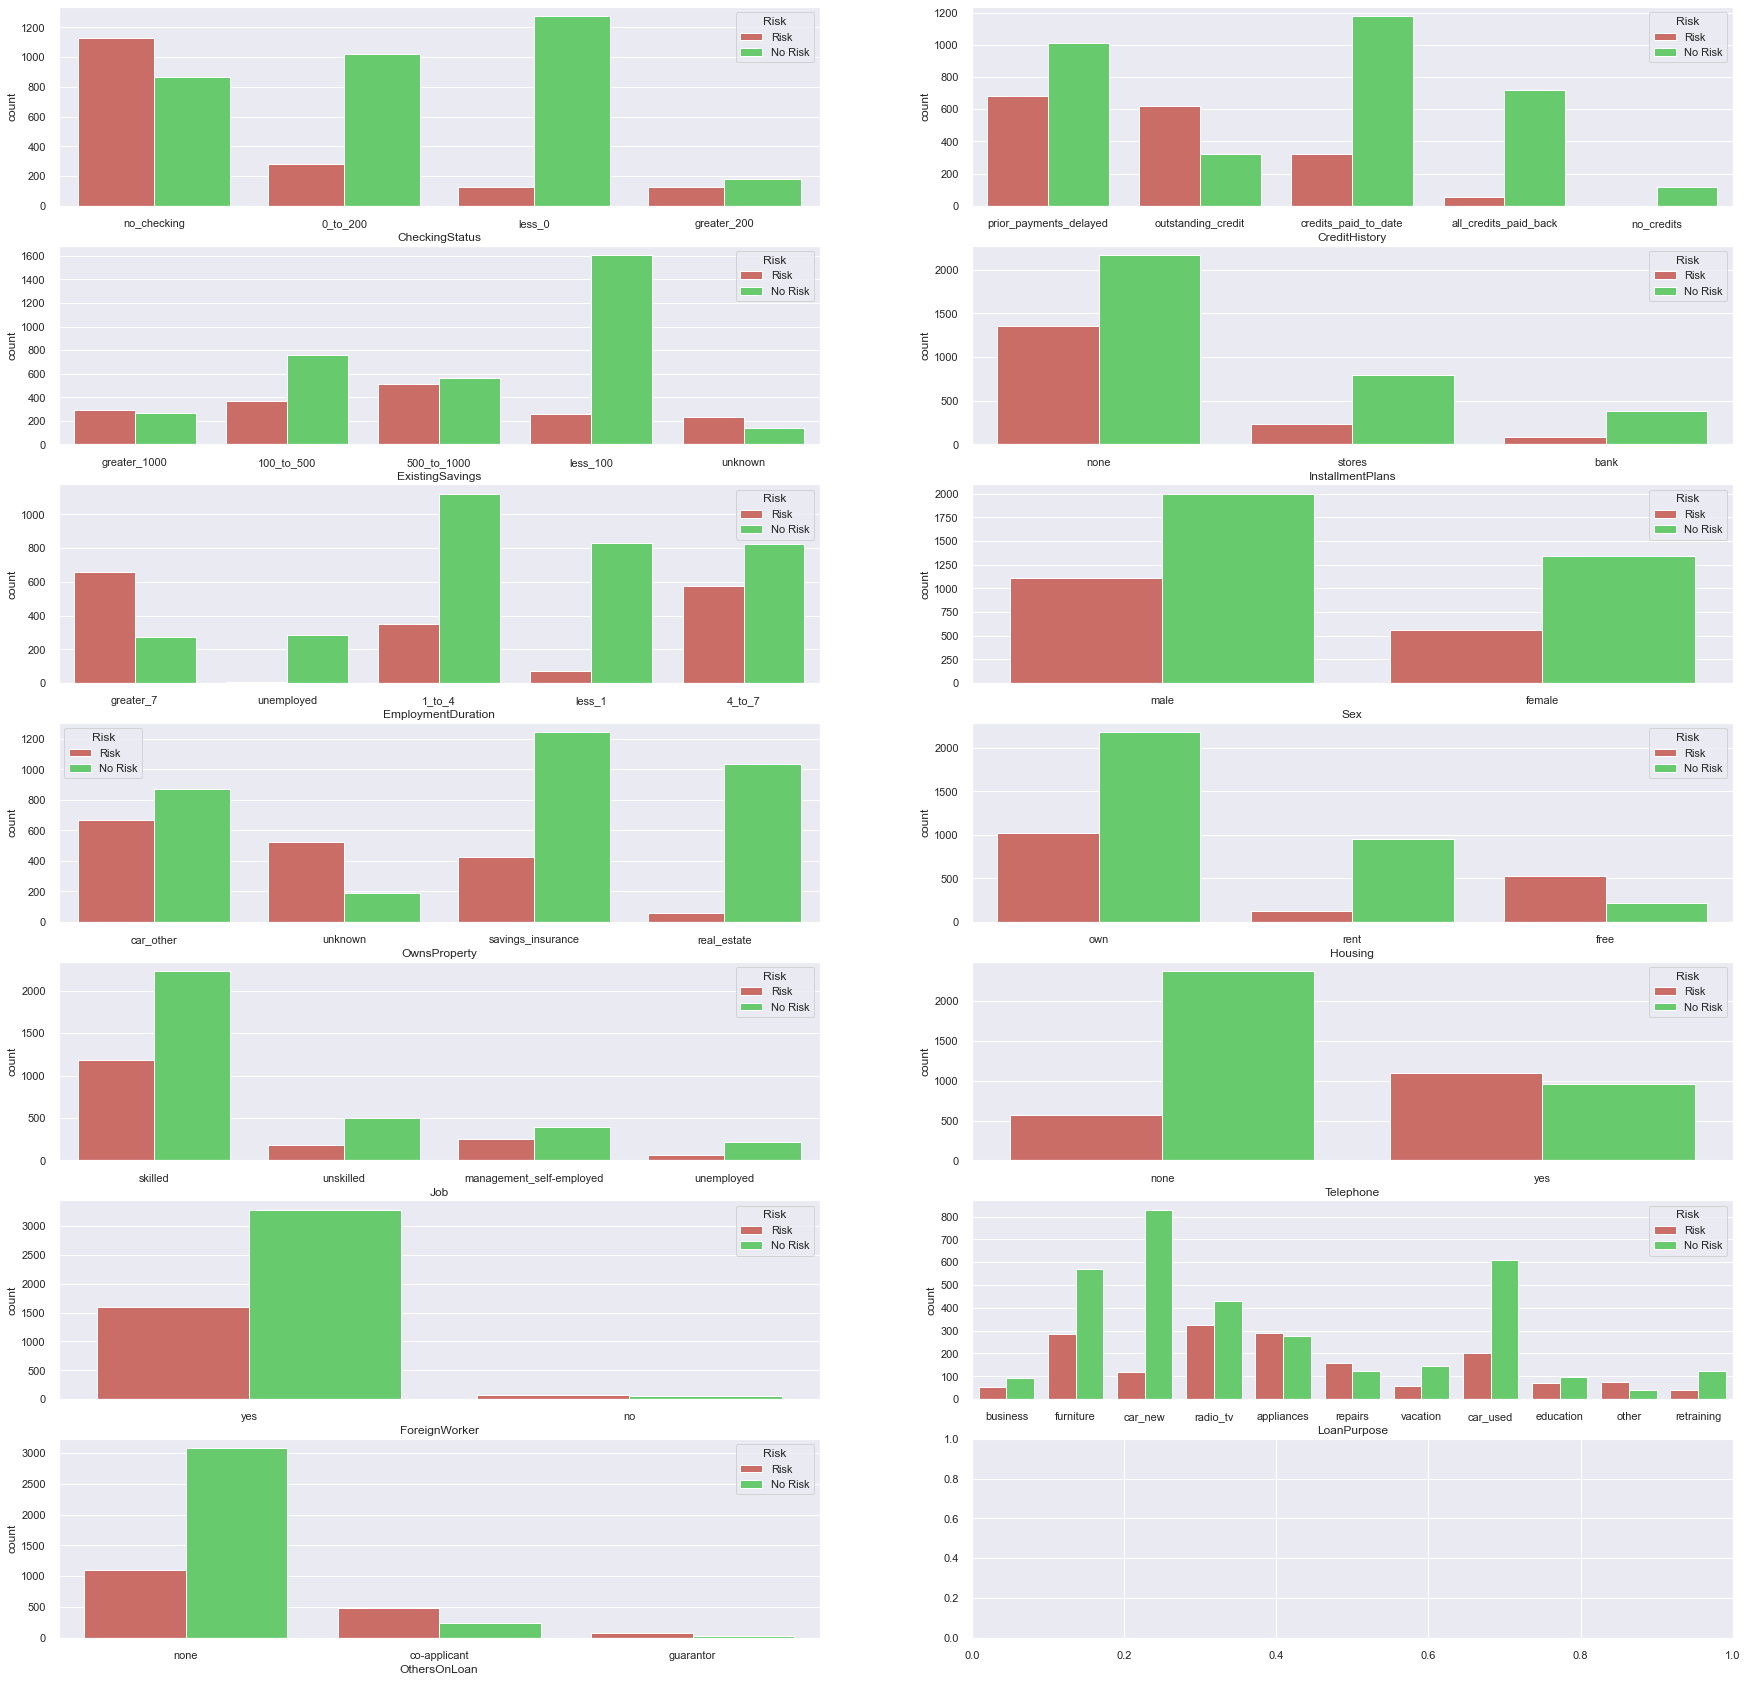

In [12]:
# Categorical feature count plots
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(30, 30))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue=TARGET_LABEL_COLUMN_NAME, data=df, ax=ax[i])

We can use histogram and boxplots to get an understanding of the distribution of our continuous / numerical features relative to Risk.

- We can see that for loans that have Risk, the `InstallmentPercent` tends to be higher (i.e. the loans with Risk tend to have loan amounts with higher percentage of the loan applicants disposable income).
- We can see that those with 'No Risk' seem to be those with fewer existing credit loans at the bank (`ExistingCreditCount`)

C:\Users\Goutham-ROG\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


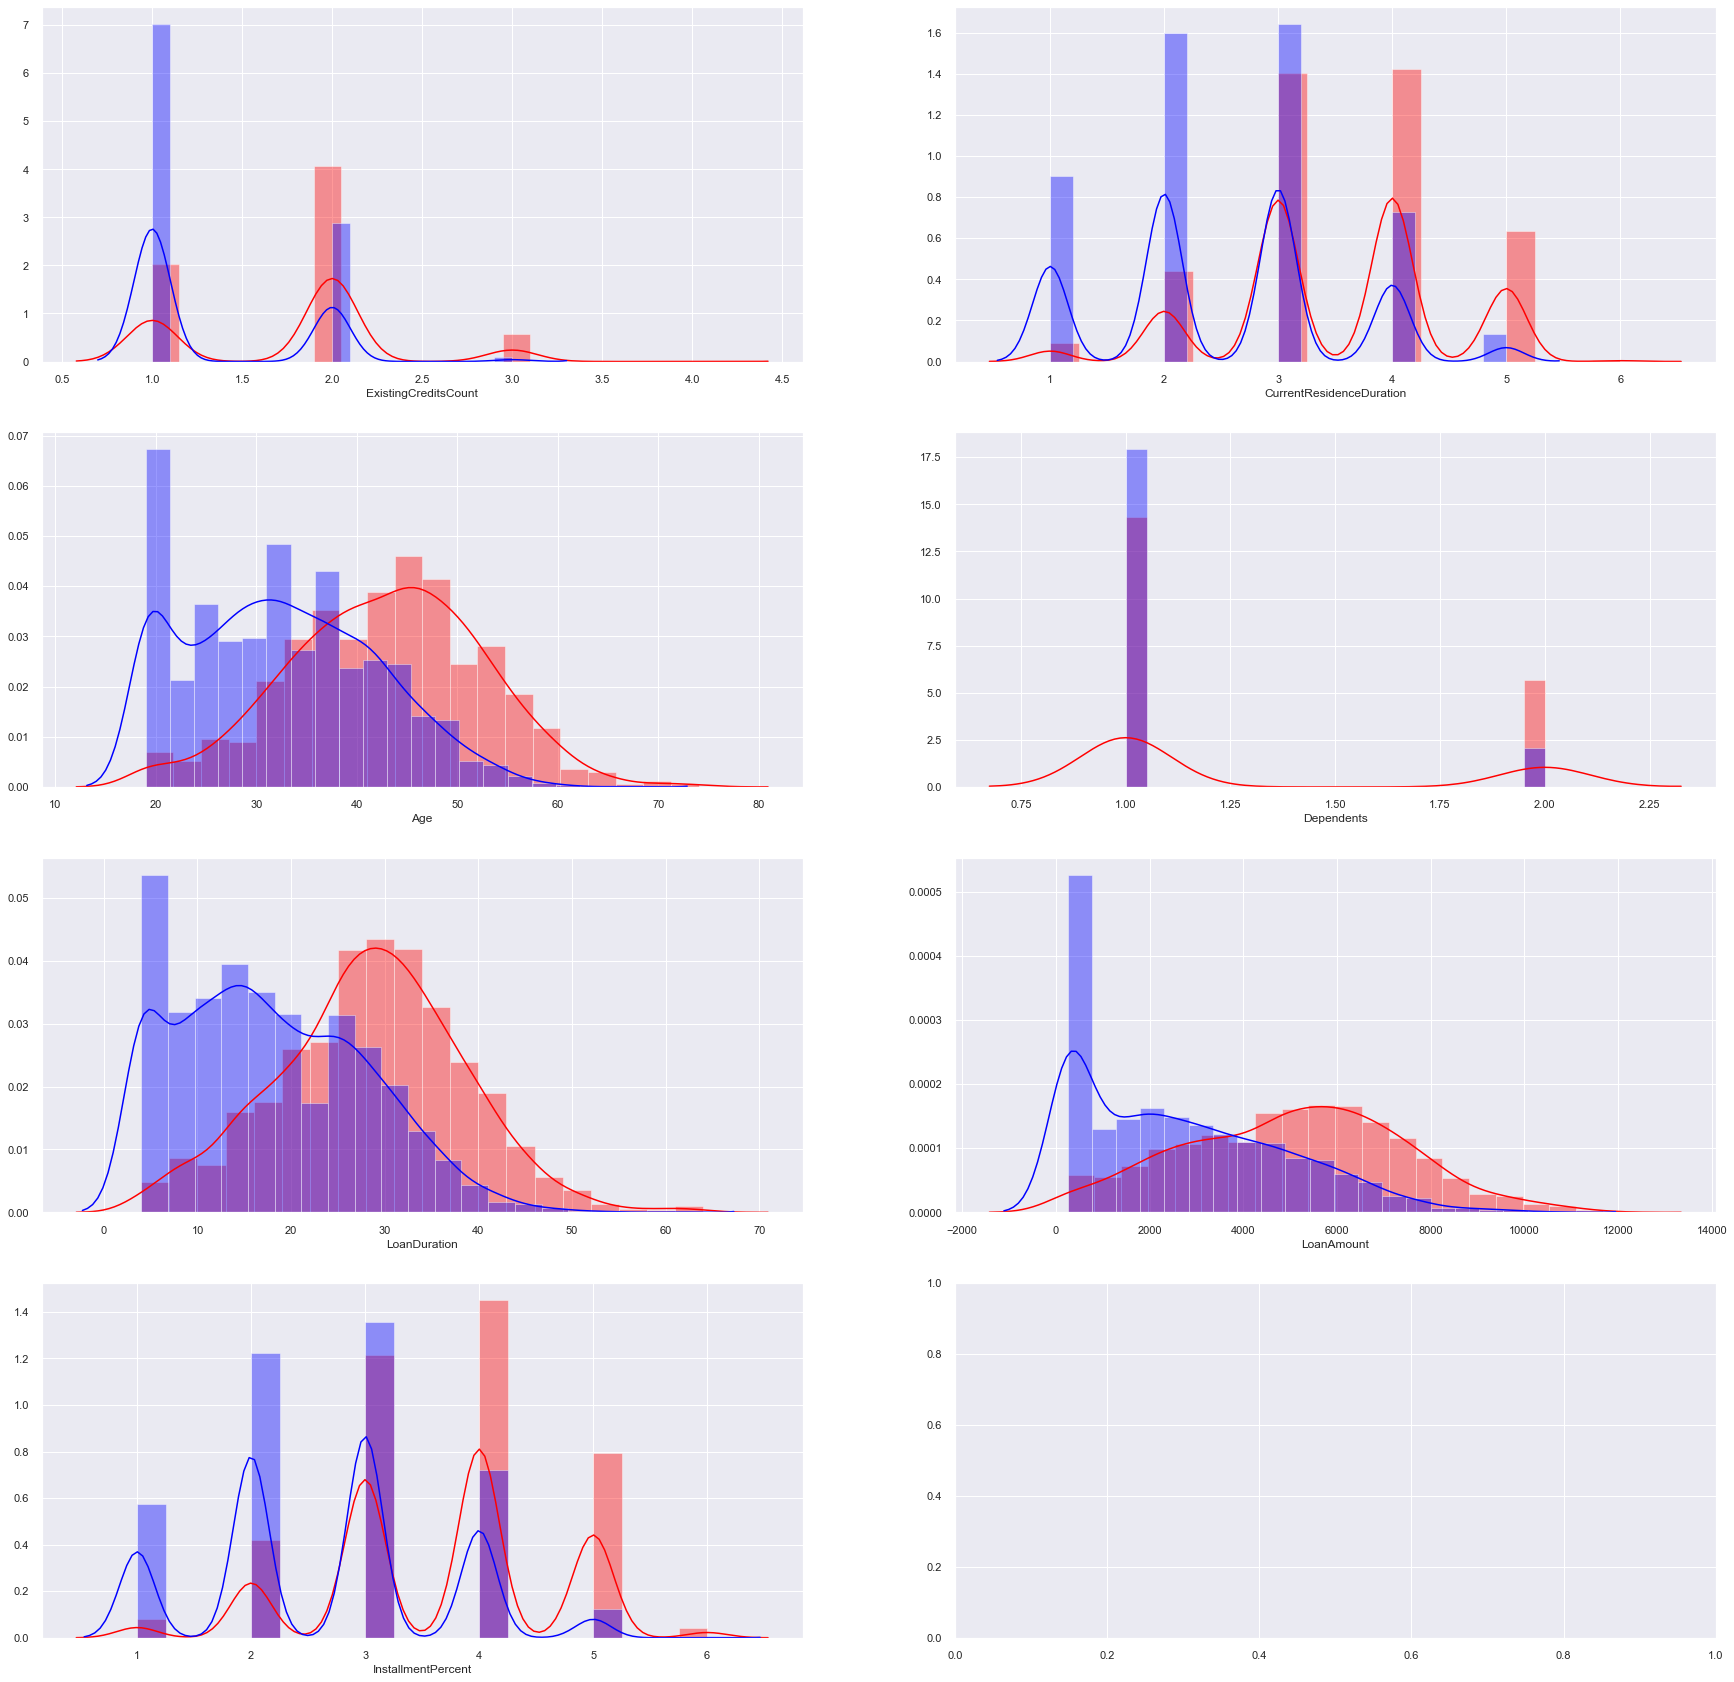

In [14]:
# Continuous feature histograms.
f, ((ax1, ax2),(ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(30, 30))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(len(continuous_features)):
    #sns.distplot(df[continuous_features[i]], bins=20, color="blue", hist=True, ax=ax[i])
    sns.distplot(df[df.Risk == 'Risk'][continuous_features[i]], bins=20, color="Red", hist=True, ax=ax[i])
    sns.distplot(df[df.Risk == 'No Risk'][continuous_features[i]], bins=20, color="blue", hist=True, ax=ax[i])


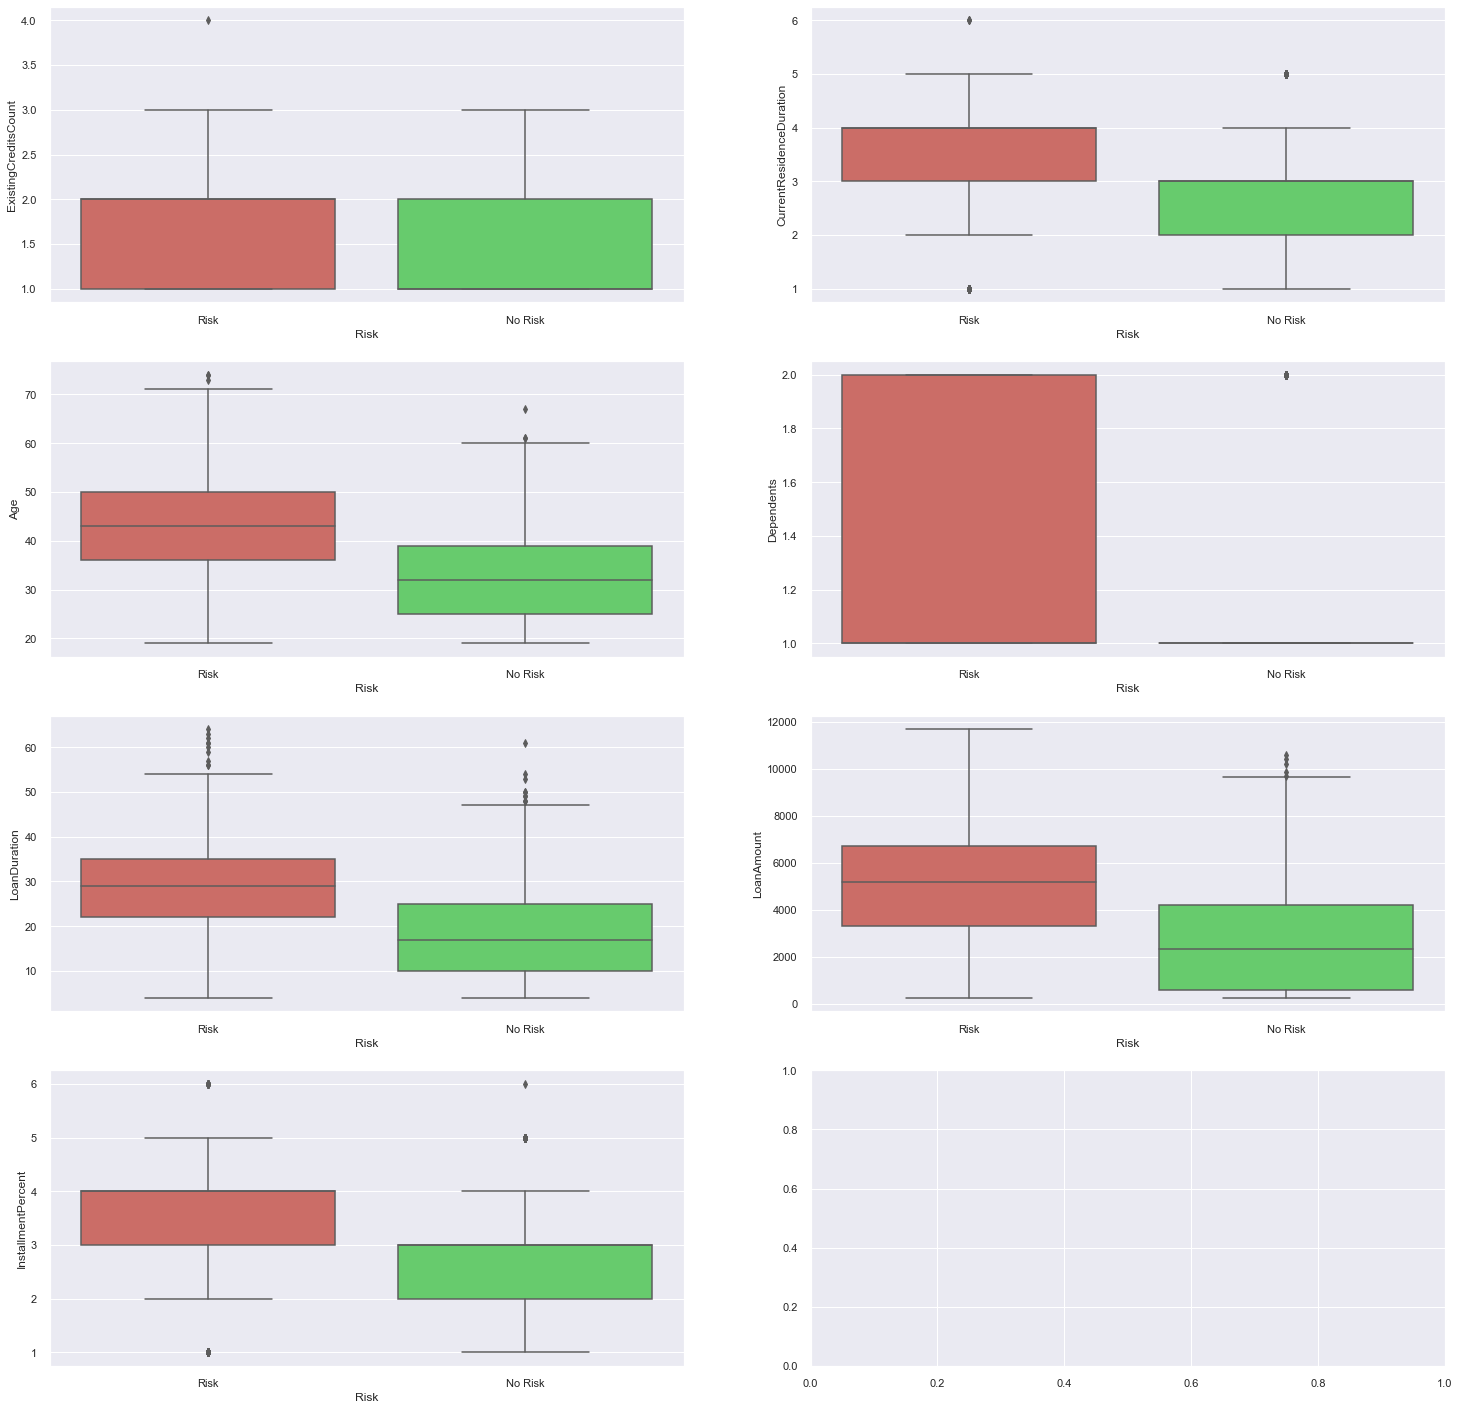

In [15]:
# Plot boxplots of numerical columns. More variation in the boxplot implies higher significance. 
f, ((ax1, ax2),(ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(len(continuous_features)):
    sns.boxplot(x = TARGET_LABEL_COLUMN_NAME, y = continuous_features[i], data=df, ax=ax[i])


## Building a PysPsark pipeline for Model

In [19]:
#libraries
from pyspark.sql import SparkSession
import pandas as pd
#spark obejct
spark = SparkSession.builder.getOrCreate()
df_data = spark.createDataFrame(df)

Row(CheckingStatus='no_checking', CreditHistory='prior_payments_delayed', ExistingSavings='greater_1000', InstallmentPlans='none', ExistingCreditsCount=2, EmploymentDuration='greater_7', Sex='male', CurrentResidenceDuration=3, OwnsProperty='car_other', Age=48, Housing='own', Job='skilled', Dependents=1, Telephone='none', ForeignWorker='yes', LoanDuration=25, LoanPurpose='business', LoanAmount=6453, InstallmentPercent=4, OthersOnLoan='none', Risk='Risk')

In [21]:
df_data.show(5)

+--------------+--------------------+---------------+----------------+--------------------+------------------+------+------------------------+-----------------+---+-------+---------+----------+---------+-------------+------------+-----------+----------+------------------+------------+-------+
|CheckingStatus|       CreditHistory|ExistingSavings|InstallmentPlans|ExistingCreditsCount|EmploymentDuration|   Sex|CurrentResidenceDuration|     OwnsProperty|Age|Housing|      Job|Dependents|Telephone|ForeignWorker|LoanDuration|LoanPurpose|LoanAmount|InstallmentPercent|OthersOnLoan|   Risk|
+--------------+--------------------+---------------+----------------+--------------------+------------------+------+------------------------+-----------------+---+-------+---------+----------+---------+-------------+------------+-----------+----------+------------------+------------+-------+
|   no_checking|prior_payments_de...|   greater_1000|            none|                   2|         greater_7|  male| 

### Split the data into training and test sets

In [22]:
spark_df = df_data
(train_data, test_data) = spark_df.randomSplit([0.8, 0.2], 24)

print("Number of records for training: " + str(train_data.count()))
print("Number of records for evaluation: " + str(test_data.count()))

Number of records for training: 4018
Number of records for evaluation: 992


In [23]:
#checking the schema
spark_df.printSchema()

root
 |-- CheckingStatus: string (nullable = true)
 |-- CreditHistory: string (nullable = true)
 |-- ExistingSavings: string (nullable = true)
 |-- InstallmentPlans: string (nullable = true)
 |-- ExistingCreditsCount: long (nullable = true)
 |-- EmploymentDuration: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- CurrentResidenceDuration: long (nullable = true)
 |-- OwnsProperty: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Housing: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Dependents: long (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- ForeignWorker: string (nullable = true)
 |-- LoanDuration: long (nullable = true)
 |-- LoanPurpose: string (nullable = true)
 |-- LoanAmount: long (nullable = true)
 |-- InstallmentPercent: long (nullable = true)
 |-- OthersOnLoan: string (nullable = true)
 |-- Risk: string (nullable = true)



### Use StringIndexer to encode a string column of labels to a column of label indices

We are using the Pipeline package to build the development steps as pipeline. 
We are using StringIndexer to handle categorical / string features from the dataset. StringIndexer encodes a string column of labels to a column of label indices

We then use VectorAssembler to asemble these features into a vector. Pipelines API requires that input variables are passed in  a vector

In [25]:
#libraries
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler, SQLTransformer
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline, Model

In [26]:
#Create StringIndexer columns whose names are same as the categorical column with an appended _IX.
categorical_num_features = [x + '_IX' for x in categorical_features]
si_list = [StringIndexer(inputCol=nm_in, outputCol=nm_out) for nm_in, nm_out in zip(categorical_features, categorical_num_features)]

In [27]:
# Encode our target label column (i.e Risk or No Risk). 
# Also, creates an label convert which performs an inverse map to get back a 'Risk' or 'No Risk' label from the encoded prediction.
si_label = StringIndexer(inputCol=TARGET_LABEL_COLUMN_NAME, outputCol="label").fit(spark_df)
label_converter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=si_label.labels)

In [28]:
# Construct all encoded categorical features plus continuous features into a vector
va_features = VectorAssembler(inputCols=categorical_num_features + continuous_features, outputCol="features")

### Create a pipeline, and fit a model using RandomForestClassifier 
Assemble all the stages into a pipeline. We don't expect a clean linear regression, so we'll use RandomForestClassifier to find the best decision tree for the data.

The pipeline will consist of: the feature string indexing step, the label string indexing step, vector assembly of all features step, random forest classifier, label converter step, and ending with a feature filter step.

In [29]:
classifier = RandomForestClassifier(featuresCol="features")
feature_filter = SQLTransformer(statement="SELECT * FROM __THIS__")
pipeline = Pipeline(stages= si_list + [si_label, va_features, classifier, label_converter, feature_filter])

model = pipeline.fit(train_data)

In [30]:
predictions = model.transform(test_data)
evaluatorDT = BinaryClassificationEvaluator(rawPredictionCol="prediction",  metricName='areaUnderROC')
area_under_curve = evaluatorDT.evaluate(predictions)

evaluatorDT = BinaryClassificationEvaluator(rawPredictionCol="prediction",  metricName='areaUnderPR')
area_under_PR = evaluatorDT.evaluate(predictions)
#default evaluation is areaUnderROC
print("areaUnderROC = %g" % area_under_curve, "areaUnderPR = %g" % area_under_PR)

areaUnderROC = 0.724357 areaUnderPR = 0.667785


### Evaluate more metrics by exporting them into pandas and numpy

In [73]:
#### from sklearn.metrics import classification_report
y_pred = predictions.toPandas()['prediction']
y_pred = ['Risk' if pred == 1.0 else 'No Risk' for pred in y_pred]
y_test = test_data.toPandas()[TARGET_LABEL_COLUMN_NAME]
print(classification_report(y_test, y_pred, target_names=['Risk', 'No Risk']))

              precision    recall  f1-score   support

        Risk       0.79      0.92      0.85       655
     No Risk       0.77      0.53      0.63       337

    accuracy                           0.79       992
   macro avg       0.78      0.72      0.74       992
weighted avg       0.78      0.79      0.77       992



## ML model

In [36]:
df.head()

,CheckingStatus,CreditHistory,ExistingSavings,InstallmentPlans,ExistingCreditsCount,EmploymentDuration,Sex,CurrentResidenceDuration,OwnsProperty,Age,...,Job,Dependents,Telephone,ForeignWorker,LoanDuration,LoanPurpose,LoanAmount,InstallmentPercent,OthersOnLoan,Risk
0,no_checking,prior_payments_delayed,greater_1000,none,2,greater_7,male,3,car_other,48,...,skilled,1,none,yes,25,business,6453,4,none,Risk
1,no_checking,prior_payments_delayed,100_to_500,stores,2,greater_7,male,3,car_other,37,...,unskilled,1,none,yes,27,furniture,7158,5,none,No Risk
2,0_to_200,outstanding_credit,100_to_500,none,2,greater_7,female,4,unknown,47,...,skilled,1,yes,yes,31,furniture,5702,3,none,Risk
3,0_to_200,credits_paid_to_date,100_to_500,stores,1,unemployed,male,1,savings_insurance,29,...,skilled,1,none,yes,14,car_new,2886,1,none,No Risk
4,less_0,prior_payments_delayed,500_to_1000,stores,2,greater_7,male,1,car_other,41,...,skilled,1,none,yes,15,furniture,2746,3,none,No Risk


In [63]:
y = np.array(df["Risk"]!='Risk')

In [64]:
y

array([False,  True, False, ...,  True,  True,  True])

In [65]:
df_new=pd.get_dummies(df.iloc[:,:-1])

In [66]:
df_new.shape

(5010, 60)

In [67]:
X = df_new

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [70]:
from sklearn.metrics import f1_score
pred=model.predict(X_test)
f1_score(y_test,pred)

0.8503729706011408

## Pickle file

In [71]:
import pickle

pkl_file = open("Credit_risk.pkl", "wb")  #open the file in write mode

In [72]:
pickle.dump(model, pkl_file) #dump our trained model

In [74]:
pkl_file.close() #always develop a good habit of closing the file 